In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv("../DATA/wine_fraud.csv")

In [4]:
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,type
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,Legit,red
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,Legit,red
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,Legit,red
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,Legit,red
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,Legit,red


In [84]:
df['quality'].unique()

array(['Legit', 'Fraud'], dtype=object)

/Users/macbookpro/envs/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='quality', ylabel='count'>

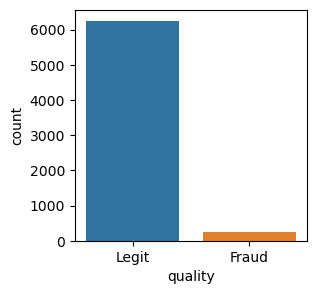

In [85]:
plt.figure(figsize=(3,3))
sns.countplot(df['quality'])

/Users/macbookpro/envs/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='type', ylabel='count'>

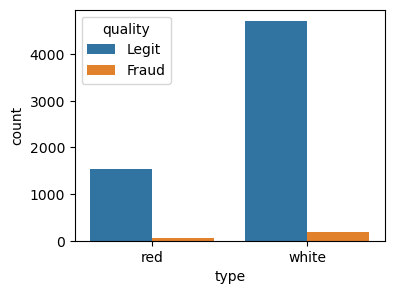

In [86]:
plt.figure(figsize=(4,3))
sns.countplot(df['type'], hue=df['quality'])

In [87]:
r = 100*len(df[(df['type']=='red') & (df['quality']=='Fraud')])/len(df[df['type']=='red'])
print("Percentage of fraud in Red Wines: ",r)

Percentage of fraud in Red Wines:  3.9399624765478425


In [88]:
w = 100*len(df[(df['type']=='white') & (df['quality']=='Fraud')])/len(df[df['type']=='white'])
print("Percentage of fraud in White Wines: ",w)

Percentage of fraud in White Wines:  3.736218864842793


In [89]:
qual = {'Legit':1, 'Fraud':0}
df['b_quality'] = df['quality'].map(qual)
print(df)

      fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0               7.4              0.70         0.00             1.9      0.076   
1               7.8              0.88         0.00             2.6      0.098   
2               7.8              0.76         0.04             2.3      0.092   
3              11.2              0.28         0.56             1.9      0.075   
4               7.4              0.70         0.00             1.9      0.076   
...             ...               ...          ...             ...        ...   
6492            6.2              0.21         0.29             1.6      0.039   
6493            6.6              0.32         0.36             8.0      0.047   
6494            6.5              0.24         0.19             1.2      0.041   
6495            5.5              0.29         0.30             1.1      0.022   
6496            6.0              0.21         0.38             0.8      0.020   

      free sulfur dioxide  

In [90]:
df.corr()['b_quality']

fixed acidity          -0.021794
volatile acidity       -0.151228
citric acid             0.061789
residual sugar          0.048756
chlorides              -0.034499
free sulfur dioxide     0.085204
total sulfur dioxide    0.035252
density                -0.016351
pH                     -0.020107
sulphates               0.034046
alcohol                 0.051141
b_quality               1.000000
Name: b_quality, dtype: float64

[None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None]

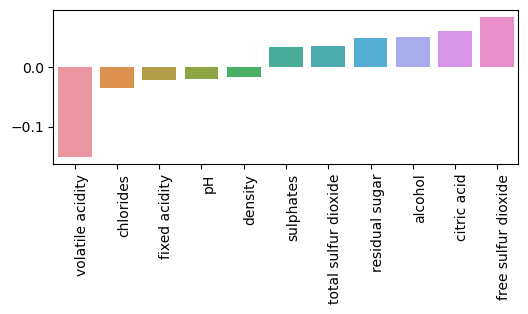

In [91]:
fig, ax = plt.subplots(figsize=(6,2))
sort = pd.Series(df.corr()['b_quality'])
sort = sort.sort_values()
sort.pop('b_quality')
sns.barplot(x=sort.index, y=sort.values)
plt.setp( ax.xaxis.get_majorticklabels(), rotation=90, ha="left" )

<AxesSubplot:>

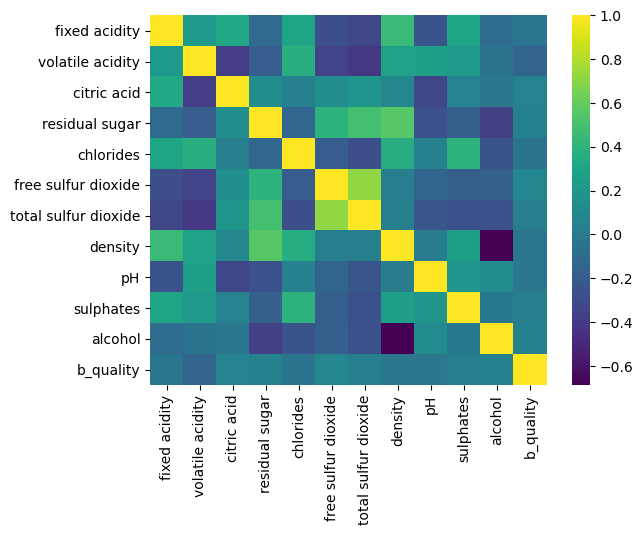

In [92]:
sns.heatmap(df.corr(), cmap = 'viridis')

In [93]:
df_dum = df['type']

In [94]:
df_dum = pd.get_dummies(df_dum,drop_first=True)

In [95]:
pd.concat([df,df_dum], axis=1)
df = df.drop(['b_quality','type'], axis=1)

In [96]:
X = df.drop('quality', axis=1)
y = df['quality']

In [97]:
from sklearn.model_selection import train_test_split

**TASK: Perform a Train|Test split on the data, with a 10% test size. Note: The solution uses a random state of 101**

In [98]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=101)

In [99]:
from sklearn.preprocessing import StandardScaler

**TASK: Scale the X train and X test data.**

In [100]:
scaler = StandardScaler()

In [101]:
scaled_X_train = scaler.fit_transform(X_train)
scaled_X_test = scaler.transform(X_test)

**TASK: Create an instance of a Support Vector Machine classifier. Previously we have left this model "blank", (e.g. with no parameters). However, we already know that the classes are unbalanced, in an attempt to help alleviate this issue, we can automatically adjust weights inversely proportional to class frequencies in the input data with a argument call in the SVC() call. Check out the [documentation for SVC](https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html) online and look up what the argument\parameter is.**

In [102]:
from sklearn.svm import SVC

In [103]:
svc = SVC(class_weight='balanced')

In [104]:
from sklearn.model_selection import GridSearchCV

**TASK: Use a GridSearchCV to run a grid search for the best C and gamma parameters.**

In [105]:
param = {'C':[0.001,0.01,0.1,0.5,1], 'gamma':['scale','auto']}
grid = GridSearchCV(svc,param)

In [106]:
grid.fit(scaled_X_train,y_train)

GridSearchCV(estimator=SVC(class_weight='balanced'),
             param_grid={'C': [0.001, 0.01, 0.1, 0.5, 1],
                         'gamma': ['scale', 'auto']})

In [107]:
grid.best_score_

0.8419727577811409

In [108]:
grid.best_params_

{'C': 1, 'gamma': 'scale'}

In [109]:
from sklearn.metrics import confusion_matrix,classification_report

**TASK: Display the confusion matrix and classification report for your model.**

In [110]:
y_pred = grid.predict(scaled_X_test)

In [112]:
print(confusion_matrix(y_pred,y_test))

[[ 18  96]
 [  9 527]]


In [113]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

       Fraud       0.16      0.67      0.26        27
       Legit       0.98      0.85      0.91       623

    accuracy                           0.84       650
   macro avg       0.57      0.76      0.58       650
weighted avg       0.95      0.84      0.88       650



**TASK: Finally, think about how well this model performed, would you suggest using it? Realistically will this work?**

In [111]:
# ANSWER: View the solutions video for full discussion on this.